# Tehtävä 1

1. Ensimmäinen luento
2. Toinen luento
3. Toinen luento
4. Toinen luento
5. Luento 4
6. Luento 4
7. Luento 4
8. Luento 5

## 1. Aineiston tuonti ja tutustuminen

Tuo Titanic-aineisto ja tutustu siihen. Vastaa sanallisesti seuraaviin kysymyksiin:

1. Kuinka monta riviä ja saraketta aineistossa on?
2. Kuinka monta puuttuvaa arvoa muuttujalla 'age' on?

In [1]:
# Tuodaan kirjastot ja aineisto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# rivien ja sarakkeiden lkm
df.shape

(1309, 14)

In [3]:
# "age" puuttuvat arvot
df["age"].isnull().sum()

np.int64(263)

1. Aineistossa on 1309 riviä ja 14 saraketta
2. Sarakkeella age on 263 puuttuvaa arvoa

## 2. Tarkastele frekvenssitaulukolla sukupuolijakaumaa ja muodosta lisäksi pylväskaavio frekvensseistä. Vastaa sanallisesti seuraaviin kysymyksiin:

1. Kuinka monta miestä laivalla oli?
2. Kuinka monta prosenttia tämä oli kaikista matkustajista?

In [4]:
df_sp = pd.crosstab(df["sex"], "f")
df_sp.columns.name = ""

# prosenttiosuus = sukupuoli/kaikki*100
df_sp["%"] = df_sp["f"] / df.shape[0] * 100

tyyli = {"f": "{:.0f}", "%": "{:.1f}"}
df_sp.style.format(tyyli)

,f,%
sex,,
female,466,35.6
male,843,64.4


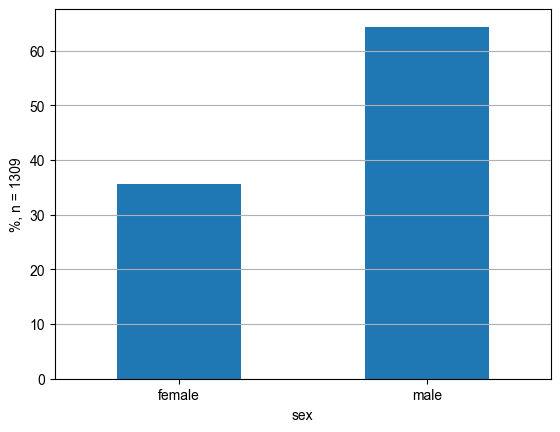

In [5]:
df_sp["%"].plot(kind="bar", rot=0)
plt.ylabel(f"%, n = {df.shape[0]}")
plt.grid(axis="y")
sns.set_style("white")

1. Laivalla oli 843 miestä.
2. Miehiä oli 64,4 prosenttia kaikista matkustajista.

## 3. Tee suodatus, jossa on vain 3. luokan yli 40-vuotiaat matkustajat. Vastaa sanallisesti kysymykseen, kuinka monta tällaista matkustajaa oli.

In [6]:
df[(df["pclass"] == 3) & (df["age"] > 40)].shape[0]

48

Yli 40-vuotiaita 3. luokan matkustajia on 48.

## 4. Laske muuttujalle 'age' tavanomaiset tilastolliset tunnusluvut (ainakin keskiarvo, mediaani, keskihajonta, minimi, maksimi, alakvartiili ja yläkvartiili). Vastaa sanallisesti seuraaviin kysymyksiin:
1. Kuinka vanha laivan vanhin matkustaja oli?
2. Mikä oli matkustajien mediaani-ikä?

In [7]:
c = df["age"]

print(f"""maksimi {c.max()}
minimi {c.min()}
mediaani {c.median()}
keskiarvo {c.mean()}
keskihajonta {c.std()}
alakvartaali {c.quantile(0.25)}
yläkvartaali {c.quantile(0.75)}""")

maksimi 80.0
minimi 0.1667
mediaani 28.0
keskiarvo 29.8811345124283
keskihajonta 14.413499699923602
alakvartaali 21.0
yläkvartaali 39.0


1. Laivan vanhin matkustaja oli 80-vuotias.
2. Matkustajien mediaani-ikä oli 28-vuotta.

## 5. Ristiintaulukoi muuttujat sukupuoli ja selviytyminen. Muodosta ristiintaulukointi niin, että luvut esitetään prosentteina sukupuolittain. Vastaa sanallisesti seuraaviin kysymyksiin:
1. Kuinka monta prosenttia miehistä selviytyi?
2. Miten kuvailisit selviytymistodennäköisyyden eroa sukupuolten välillä?

In [8]:
df1 = pd.crosstab(df["survived"], df["sex"])

# Lasketaan naisten ja miesten määrä yhteensä
n_female = df1["female"].sum()
n_male = df1["male"].sum()

In [9]:
df1 = pd.crosstab(df["survived"], df["sex"], normalize="columns")*100

df1.columns = [f"Naiset, n={n_female}", f"Miehet, n={n_male}"]
df1.index = ["Ei", "Kyllä"]
df1.columns.name = "Selviytyi"

df1.style.format("{:.1f} %")

Selviytyi,"Naiset, n=466","Miehet, n=843"
Ei,27.3 %,80.9 %
Kyllä,72.7 %,19.1 %


1. Miehistä selviytyi 19,1 prosenttia.
2. Naisista selviytyi 72,8 prosenttia, joten naisten selviytymistodennäköisyys oli huomattavasti suurempi verrattuna miehiin.

## 6. Laadi frekvenssitaulukko luokitellulle ikämuuttujalle. Ensimmäisen luokan alarajan tulee olla 0 vuotta ja luokkien koon 10 vuotta. Esitä jakauma vastaavalla histogrammilla. Vastaa sanallisesti seuraavaan kysymykseen: Missä ikäluokassa matkustajia oli eniten?

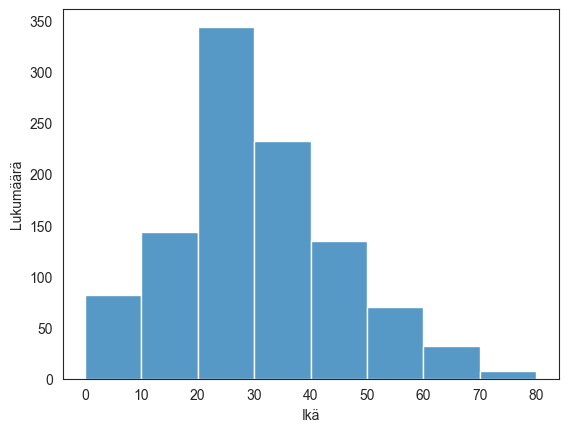

In [12]:
rajat = [0, 10, 20, 30, 40, 50, 60, 70, 80]

#df2 = pd.cut(df["age"], bins=rajat, right=False)

sns.histplot(df["age"], bins=rajat)

plt.xlabel("Ikä")
plt.ylabel("Lukumäärä")

plt.show()


Histogrammista nähdään, että matkustajia oli eniten ikäluokassa 20 - 30.

## 7. Tarkastele passenger fare -muuttujan jakaumaa eri matkustajaluokkien välillä: Laadi taulukko, jossa on tavanomaiset tunnusluvut (ainakin keskiarvo, mediaani, keskihajonta, minimi, maksimi, alakvartiili ja yläkvartiili) passenger fare -muuttujalle kussakin matkustajaluokassa. Esitä tämä visuaalisesti vastaavilla laatikkojanakuvioilla. Vastaa sanallisesti seuraaviin kysymyksiin:
1. Mikä oli passenger fare -muuttujan keskiarvo 2. matkustajaluokassa?
2. Miten kuvailisit matkustajaluokan ja passenger fare -muuttujan yhteyttä?

In [ ]:
## koodi tähän

Tähän vastaukset sanallisiin kysymyksiin.

## 8. Laske muuttujien passenger fare ja age välinen korrelaatiokerroin. Muodosta kaavio, joka kuvaa näiden muuttujien yhteyttä. Vastaa sanallisesti seuraaviin kysymyksiin:
1. Onko muuttujien välinen yhteys positiivinen vai negatiivinen?
2. Onko yhteys voimakas vai heikko? Perustele.

In [ ]:
## koodi tähän

Tähän vastaukset sanallisiin kysymyksiin.